In [2]:
import numpy as np
from matplotlib import pyplot
import matplotlib
matplotlib.rcParams['figure.dpi']=200
import rebound

In [3]:
vd = np.loadtxt('starman_orbit')

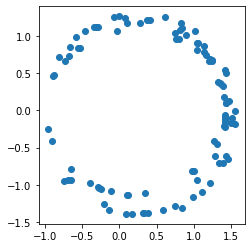

In [4]:
pyplot.scatter(vd[:,0],vd[:,1])
pyplot.gca().set_aspect('equal')

In [9]:
sim = rebound.Simulation()
sim.units = ('AU','yr','MSun')

In [10]:
a = []
e = []
inc = []
P = []
for i in range(0,100):
    sim.add(m=9.999999999950272001e-01)
    #sim.add(m=3.040432648951118466e-06,x=vd[i][0],y=vd[i][1],z=vd[i][2],vx=vd[i][3],vy=vd[i][4],vz=vd[i][5])
    #sim.add(m=9.547919099366767616e-04,x=vd[i][0],y=vd[i][1],z=vd[i][2],vx=vd[i][3],vy=vd[i][4],vz=vd[i][5])
    #sim.add(m=5.151383772628956873e-05,x=vd[i][0],y=vd[i][1],z=vd[i][2],vx=vd[i][3],vy=vd[i][4],vz=vd[i][5])
   # sim.add(m=3.227156082897851353e-07,x=vd[i][0],y=vd[i][1],z=vd[i][2],vx=vd[i][3],vy=vd[i][4],vz=vd[i][5])
    sim.add(m=0.0,x=vd[i][0],y=vd[i][1],z=vd[i][2],vx=vd[i][3],vy=vd[i][4],vz=vd[i][5])
    #sim.add(m=2.447838287784771116e-06,x=vd[i][0],y=vd[i][1],z=vd[i][2],vx=vd[i][3],vy=vd[i][4],vz=vd[i][5])
    orbit = sim.particles[1].calculate_orbit(primary=sim.particles[0])
    a.append(orbit.a)
    e.append(orbit.e)
    inc.append(orbit.inc*180.0/np.pi)
    P.append(orbit.P)
    del sim.particles

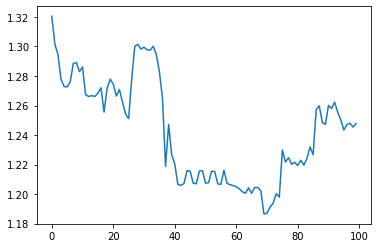

In [12]:
pyplot.plot(a)
#pyplot.yscale('log')

In [372]:
sim2 = rebound.Simulation()
sim2.units = ('AU','yr','MSun')
sim2.integrator = 'whfast'

In [373]:
d_s = np.loadtxt("solar_system.dat")

In [374]:
x0 = 0#d_s[0][1]
y0 = 0#d_s[0][2]
z0 = 0#d_s[0][3]
vx0 =0 #d_s[0][4]
vy0 =0 #d_s[0][5]
vz0 =0 #d_s[0][6]


In [375]:
for i in range(0,len(d_s[:,0])):
    sim2.add(m=d_s[i][0],x=d_s[i][1]-x0,y=d_s[i][2]-y0,z=d_s[i][3]-z0,vx=d_s[i][4]-vx0,vy=d_s[i][5]-vy0,vz=d_s[i][6]-vz0)
    

In [376]:
sim2.N_active = 1
sim2.testparticle_type = 1
sim2.dt=1
#sim2.move_to_com()

In [341]:
sim2.status()

---------------------------------
REBOUND version:     	3.22.0
REBOUND built on:    	Nov 22 2022 13:18:14
Number of particles: 	8
Selected integrator: 	ias15
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.001000
---------------------------------
<rebound.particle.Particle object at 0x7f6cfdb44540, m=0.9999999999950272 x=0.001563015356066952 y=0.006325156880704499 z=-0.000114422249646109 vx=-0.002238956472089651 vy=0.0017276118331597213 vz=5.3786223958998546e-05>
<rebound.particle.Particle object at 0x7f6cfdb44140, m=2.447838287784771e-06 x=0.6792786265730657 y=-0.2552189423983315 z=-0.04281068269527626 vx=2.6166880309039473 vy=6.861858519676707 vz=-0.056972009142029996>
<rebound.particle.Particle object at 0x7f6cfdb44540, m=3.0404326489511185e-06 x=-0.7646574314458591 y=0.6280830649726069 z=-0.0001375562412181072 vx=-4.0639377712954845 vy=-4.90122835770004 vz=0.0002767088232694445>
<rebound.particle.Particle object at 0x7f6cfdb44140, m=3.2271560828978514e-07 x=-1.

In [377]:
a_sim = []
e_sim = []
inc_sim = []
P_sim = []

for i in range(0,100):
    sim2.integrate(sim2.t + 2)
    orbit = sim2.particles[4].calculate_orbit(primary=sim2.particles[0])
    a_sim.append(orbit.a)
    e_sim.append(orbit.e)
    inc_sim.append(orbit.inc * 180. / np.pi)
    P_sim.append(orbit.P)

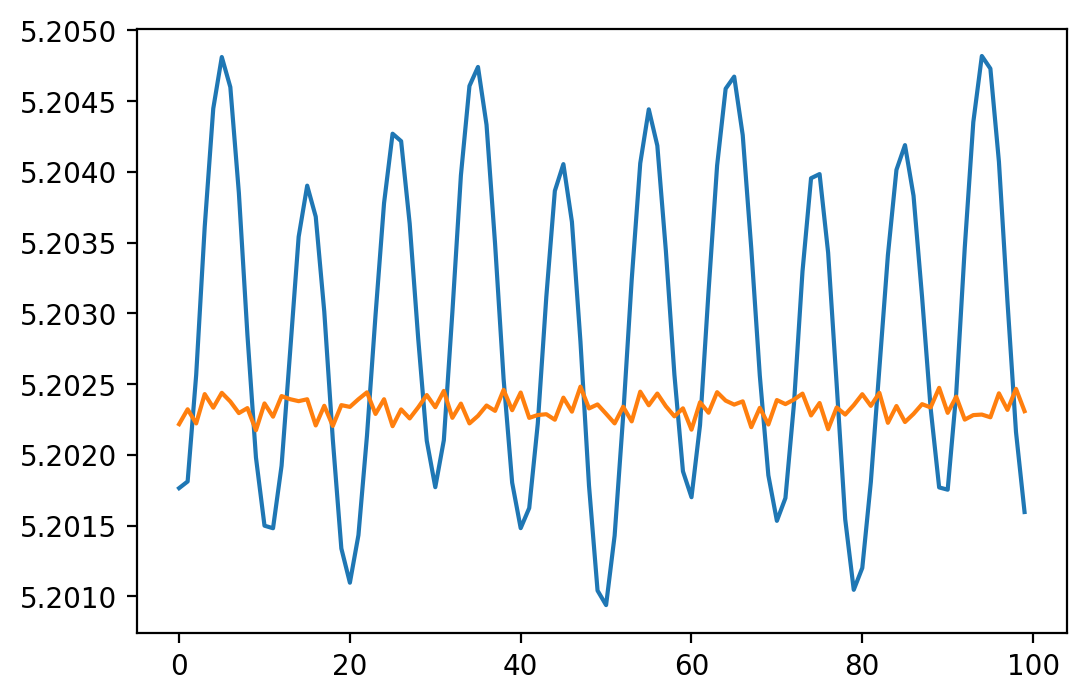

In [532]:
pyplot.plot(a_sim)
pyplot.plot(a)